In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib_venn as venn2
from scipy import stats

In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
filepath1="/content/drive/My Drive/State_data.csv"
filepath2="/content/drive/My Drive/Data.csv"
filepath3="/content/drive/My Drive/NCAP_Funding.csv"


Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [9]:
data=pd.read_csv(filepath2)
ncap_funding=pd.read_csv(filepath3)
state_data=pd.read_csv(filepath1)

In [10]:
pm25_avg=data.groupby('state')['PM2.5'].agg(['mean'])
print(pm25_avg)
highest_state = pm25_avg['mean'].idxmax()
highest_avg = pm25_avg['mean'].max()
print(f"State with highest PM2.5: {highest_state}, Average PM2.5: {highest_avg:.2f}µg/m³")

                         mean
state                        
Andhra Pradesh      35.049347
Arunachal Pradesh   22.674513
Assam               57.962372
Bihar               76.918759
Chandigarh          56.666803
Chhattisgarh        28.761571
Delhi              104.100918
Gujarat             52.462657
Haryana             72.371070
Himachal Pradesh    62.516878
Jammu and Kashmir   28.574696
Jharkhand           54.281545
Karnataka           28.894840
Kerala              29.404793
Madhya Pradesh      45.874375
Maharashtra         43.491415
Manipur             34.911856
Meghalaya           24.513390
Mizoram             11.784922
Nagaland            33.439550
Odisha              52.109504
Puducherry          22.854171
Punjab              52.243166
Rajasthan           54.230341
Sikkim              13.474286
Tamil Nadu          31.289620
Telangana           38.114469
Tripura             57.927642
Uttar Pradesh       70.893996
Uttarakhand         36.788767
West Bengal         54.611086
State with

Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2023 = data[data['Timestamp'].dt.year == 2023]
most_2023 = data_2023[data_2023['PM2.5'] > 300]
most_pm25 = most_2023.groupby('state')['PM2.5'].agg(['count'])
print(most_pm25)

highest_state = most_pm25['count'].idxmax()
highest_days = most_pm25['count'].max()

print(f"State with most hazardous PM2.5 levels in 2023 was {highest_state} with {highest_days} days")

                count
state                
Andhra Pradesh      2
Assam              22
Bihar             100
Delhi             470
Gujarat             4
Haryana            60
Jharkhand           1
Karnataka          14
Madhya Pradesh      8
Maharashtra        32
Odisha              1
Rajasthan          17
Tamil Nadu          3
Telangana           1
Tripura             1
Uttar Pradesh      55
State with most hazardous PM2.5 levels in 2023 was Delhi with 470 days


Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [13]:
data_2023=data[data['Timestamp'].dt.year==2023]
variability=data_2023.groupby('state')['PM2.5'].agg(['std'])
print(variability)
highest_state=variability['std'].idxmax()
highest_variability=variability['std'].max()
print(f'State with highest variability in 2023 was {highest_state} with {highest_variability:.2f}')

                         std
state                       
Andhra Pradesh     26.470621
Arunachal Pradesh  10.486218
Assam              61.501105
Bihar              63.734196
Chandigarh         37.715544
Chhattisgarh       20.076441
Delhi              82.797106
Gujarat            33.210780
Haryana            52.534649
Himachal Pradesh   45.573949
Jammu and Kashmir  17.571078
Jharkhand          40.211922
Karnataka          26.745988
Kerala             17.071595
Madhya Pradesh     40.026787
Maharashtra        39.960771
Manipur            31.033988
Meghalaya          22.994036
Mizoram             8.181937
Nagaland           20.281620
Odisha             36.130086
Puducherry         15.927181
Punjab             33.583028
Rajasthan          39.929352
Sikkim             19.351219
Tamil Nadu         22.017688
Telangana          18.842444
Tripura            46.884462
Uttar Pradesh      45.749190
Uttarakhand        20.194756
West Bengal        34.347047
State with highest variability in 2023 was 

Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [14]:
data_2020 = data[data['Timestamp'].dt.year == 2020]
data_2021 = data[data['Timestamp'].dt.year == 2021]
data_covid = pd.concat([data_2020, data_2021])
covid_data=data_covid.groupby(['state'])['PM2.5'].agg(['mean'])
print(covid_data)
lowest_state=covid_data['mean'].idxmin()
lowest_avg=covid_data['mean'].min()
print(f'The state with lowest avg PM2.5 during COVID period is {lowest_state} with {lowest_avg:.2f}')


                         mean
state                        
Andhra Pradesh      31.861788
Arunachal Pradesh   14.751325
Assam               61.463611
Bihar               75.120788
Chandigarh          39.586587
Chhattisgarh        24.863968
Delhi              100.613293
Gujarat             49.954478
Haryana             71.858425
Himachal Pradesh          NaN
Jammu and Kashmir   31.909474
Jharkhand           57.042476
Karnataka           27.604270
Kerala              26.407500
Madhya Pradesh      44.957182
Maharashtra         44.668592
Manipur                   NaN
Meghalaya           16.579606
Mizoram             14.323350
Nagaland            32.389944
Odisha              46.927677
Puducherry          20.198304
Punjab              49.561781
Rajasthan           56.182164
Sikkim                    NaN
Tamil Nadu          29.679225
Telangana           37.936372
Tripura             50.124667
Uttar Pradesh       87.086041
Uttarakhand               NaN
West Bengal         55.807568
The state 

Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

                       sum
state                     
Andhra Pradesh        0.02
Arunachal Pradesh     0.00
Assam                 0.03
Bihar                 0.17
Chandigarh         2058.23
Chhattisgarh          0.00
Delhi              6673.17
Gujarat               0.00
Haryana              15.15
Himachal Pradesh      0.03
Jammu and Kashmir     0.00
Jharkhand             0.02
Karnataka             0.13
Kerala                0.20
Madhya Pradesh        0.00
Maharashtra           0.00
Manipur               0.55
Meghalaya             0.12
Mizoram               0.00
Nagaland              0.37
Odisha                0.02
Puducherry           67.70
Punjab                0.42
Rajasthan             0.00
Sikkim                0.67
Tamil Nadu            0.04
Telangana             0.01
Tripura               8.91
Uttar Pradesh         0.00
Uttarakhand           0.00
West Bengal           0.01
State with highest PM2.5 concentration per square kilometer is Delhi with 6673.17


<Axes: xlabel='States', ylabel='PM2.5 concentration per sqkm'>

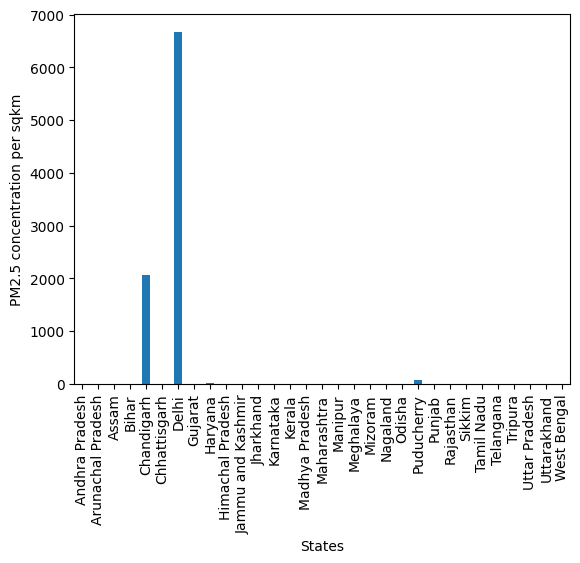

In [17]:
state_data_area['conc_per_sqkm'] = round(state_data_area['PM2.5'] / state_data_area['Area (km2)'],2)
total_conc=state_data_area.groupby('state')['conc_per_sqkm'].agg(['sum'])
print(total_conc)
highest_state=total_conc['sum'].idxmax()
highest_value=total_conc['sum'].max()
print(f'State with highest PM2.5 concentration per square kilometer is {highest_state} with {highest_value:.2f}')
total_conc.plot(kind='bar',xlabel='States',ylabel='PM2.5 concentration per sqkm',legend=False)


Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

     count              State  Population  Area_km2  stations_persqkm
0    35157     Andhra Pradesh    49577103    162975          0.215720
1     2901  Arunachal Pradesh     1383727     83743          0.034642
2    26109              Assam    31205576     78438          0.332862
3    98979              Bihar   104099452     94163          1.051145
4     8703         Chandigarh     1055450       114         76.342105
5    40614       Chhattisgarh    25545198    135192          0.300417
6   115695              Delhi    16787941      1484         77.961590
7    49317            Gujarat    60439692    196024          0.251587
8    87030            Haryana    25351462     44212          1.968470
9     2901   Himachal Pradesh     6864602     55673          0.052108
10    2901  Jammu and Kashmir    12267032     42241          0.068677
11   11604          Jharkhand    32988134     79716          0.145567
12  121842          Karnataka    61095297    191791          0.635285
13   26109          

<ipython-input-18-309065429732>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_stations['State'], rotation=90)


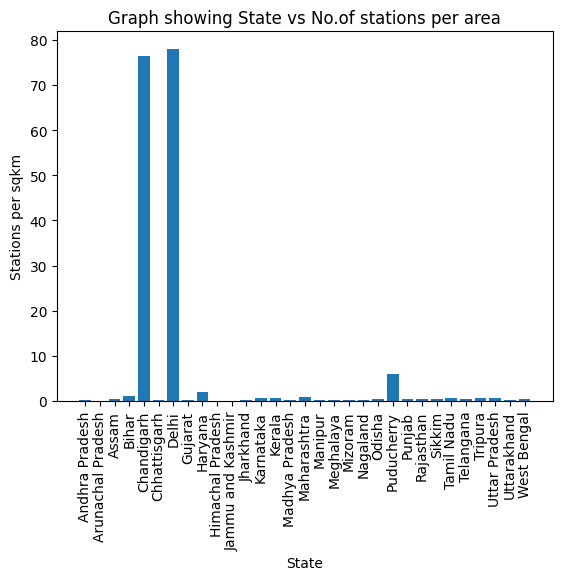

In [18]:
state_data.rename(columns={'Area (km2)': 'Area_km2'}, inplace=True)
state_data_area.rename(columns={'Area (km2)': 'Area_km2'}, inplace=True)
total_stations=state_data_area.groupby('state')['station'].agg(['count'])
total_stations=pd.merge(total_stations,state_data,left_on='state',right_on='State',how='inner')
total_stations=total_stations.eval('stations_persqkm=count/Area_km2')
print(total_stations)
highest_density_state = total_stations['stations_persqkm'].idxmax()
highest_density_state=total_stations['State'][highest_density_state]
highest_density=total_stations['stations_persqkm'].max()
print(f'State with the highest density of monitoring stations relative to its area is {highest_density_state} with {highest_density:.2f}')
fig,ax=plt.subplots()
ax.bar(total_stations['State'],total_stations['stations_persqkm'])
ax.set_xlabel('State')
ax.set_ylabel('Stations per sqkm')
ax.set_title('Graph showing State vs No.of stations per area')
ax.set_xticklabels(total_stations['State'], rotation=90)
plt.show()

Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [19]:
avg_2021=data_2021.groupby(['state'])['PM2.5'].agg(['mean'])
avg_2021_data=pd.merge(avg_2021,state_data,left_on='state',right_on='State',how='inner')
avg_2021_data=avg_2021_data.eval('Pop_density=Population/Area_km2')
maharashtra_data=avg_2021_data[avg_2021_data['State']=='Maharashtra']
mp_data=avg_2021_data[avg_2021_data['State']=='Madhya Pradesh']
print(maharashtra_data)
print(mp_data)
#Here we see that despite Maharashtra having higher population density than madhya pradesh the average PM2.5 levels is less than madhya pradesh. This shows us that Population density is not the only factor affecting the PM2.5 levels.

         mean        State  Population  Area_km2  Pop_density
15  46.440044  Maharashtra   112374333    307713   365.192023
         mean           State  Population  Area_km2  Pop_density
14  47.095952  Madhya Pradesh    72626809    308252   235.608557


Which state in India has the highest number of monitoring stations relative to its population?


In [23]:
station_pop=data_state_pop.groupby('state')['station'].agg(['count'])
station_pop=pd.merge(station_pop,state_data,left_on='state',right_on='State',how='inner')
station_pop=station_pop.eval('station_per_pop=count/Population')
display(station_pop)
max_station_per_pop_state = station_pop.loc[station_pop['station_per_pop'].idxmax(), 'State']
max_station_per_pop_value = station_pop['station_per_pop'].max()
print(f'State with the highest monitoring stations per population: {max_station_per_pop_state} ({max_station_per_pop_value:.6f})')

,count,State,Population,Area_km2,station_per_pop
0,35157,Andhra Pradesh,49577103,162975,0.000709
1,2901,Arunachal Pradesh,1383727,83743,0.002097
2,26109,Assam,31205576,78438,0.000837
3,98979,Bihar,104099452,94163,0.000951
4,8703,Chandigarh,1055450,114,0.008246
5,40614,Chhattisgarh,25545198,135192,0.001590
6,115695,Delhi,16787941,1484,0.006892
7,49317,Gujarat,60439692,196024,0.000816
8,87030,Haryana,25351462,44212,0.003433
9,2901,Himachal Pradesh,6864602,55673,0.000423


State with the highest monitoring stations per population: Chandigarh (0.008246)


Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


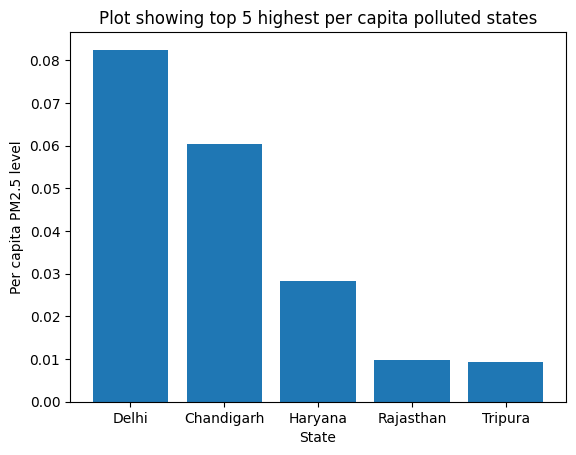

In [24]:
pm2023_data=pd.merge(data_2023,state_data,left_on='state',right_on='State',how='left')
pm2023_data=pm2023_data.drop(columns='State')
per_capita_pm25 = pm2023_data.groupby('state').agg(
    total_PM25=('PM2.5', 'sum'),
    Population=('Population', 'first')
)
per_capita_pm25=per_capita_pm25.eval('per_capita=total_PM25/Population')
ranking=per_capita_pm25.sort_values('per_capita',ascending=False)
new_final=ranking.head(5)
fig,ax=plt.subplots()
ax.bar(new_final.index,new_final['per_capita'])
ax.set_xlabel('State')
ax.set_ylabel('Per capita PM2.5 level')
ax.set_title('Plot showing top 5 highest per capita polluted states')
plt.show()


Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.

,mean,State,Population,Area_km2,pop_density
0,35.049347,Andhra Pradesh,49577103,162975,304.200663
1,22.674513,Arunachal Pradesh,1383727,83743,16.523495
2,57.962372,Assam,31205576,78438,397.837477
3,76.918759,Bihar,104099452,94163,1105.523953
4,56.666803,Chandigarh,1055450,114,9258.333333
5,28.761571,Chhattisgarh,25545198,135192,188.954953
6,104.100918,Delhi,16787941,1484,11312.628706
7,52.462657,Gujarat,60439692,196024,308.328021
8,72.371070,Haryana,25351462,44212,573.406813
9,62.516878,Himachal Pradesh,6864602,55673,123.302175


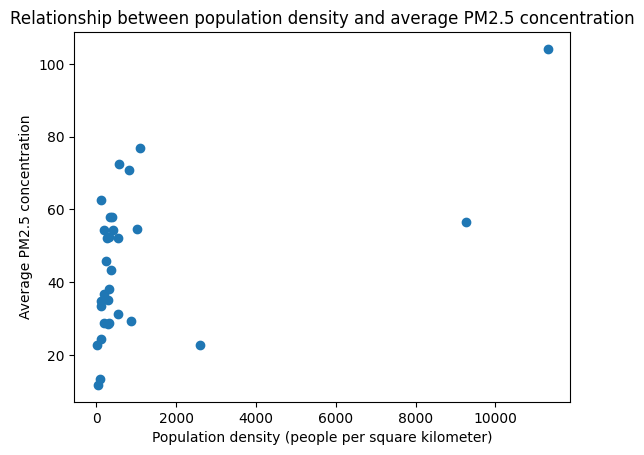

In [25]:
pop_density_pm25=pd.merge(pm25_avg,state_data,left_on='state',right_on='State',how='inner')
pop_density_pm25=pop_density_pm25.eval('pop_density=Population/Area_km2')
display(pop_density_pm25)
fig,ax=plt.subplots()
ax.scatter(pop_density_pm25['pop_density'],pop_density_pm25['mean'])
ax.set_xlabel('Population density (people per square kilometer)')
ax.set_ylabel('Average PM2.5 concentration')
ax.set_title('Relationship between population density and average PM2.5 concentration')
plt.show()

In [11]:
display(data)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [15]:
display(state_data)

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [16]:
state_data_area= pd.merge(state_data,data, left_on='State', right_on='state', how='left')
display(state_data_area)

,State,Population,Area (km2),Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,Uttar Pradesh,199812341,240928,2017-01-01,"Anand Vihar, Hapur - UPPCB",NaN,NaN,"New Collectorate Building, Anand Vihar, Delhi ...",Hapur,28.725645,77.749675,Uttar Pradesh
1,Uttar Pradesh,199812341,240928,2017-01-01,"Ardhali Bazar, Varanasi - UPPCB",166.322111,213.937,"Ordali Bazar, Tagore Town, Orderly Bazar, Vara...",Varanasi,25.350599,82.908307,Uttar Pradesh
2,Uttar Pradesh,199812341,240928,2017-01-01,"B R Ambedkar University, Lucknow - UPPCB",NaN,NaN,Babasaheb bhimrao ambedkar University Vidya vi...,Lucknow,26.766433,80.927299,Uttar Pradesh
3,Uttar Pradesh,199812341,240928,2017-01-01,"Bhelupur, Varanasi - UPPCB",NaN,NaN,"B20 193, Jalkalvibhag, Bhelupur, Varanasi, Utt...",Varanasi,25.301778,82.996789,Uttar Pradesh
4,Uttar Pradesh,199812341,240928,2017-01-01,"Buddhi Vihar, Moradabad - UPPCB",NaN,NaN,"Avas Vikas Colony, Buddhi Vihar, Moradabad, Ut...",Moradabad,28.835260,78.744600,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...
1563697,Sikkim,610577,7096,2024-12-06,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim
1563698,Sikkim,610577,7096,2024-12-07,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim
1563699,Sikkim,610577,7096,2024-12-08,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim
1563700,Sikkim,610577,7096,2024-12-09,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [20]:
display(data)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [21]:
display(state_data)

,State,Population,Area_km2
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [22]:
data_state_pop=pd.merge(data,state_data,left_on='state',right_on='State',how='left')
data_state_pop.drop(columns=['State'], inplace=True)
display(data_state_pop)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Population,Area_km2
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,25545198.0,135192.0
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,25545198.0,135192.0
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,68548437.0,342239.0
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,112374333.0,307713.0
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,112374333.0,307713.0
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,199812341.0,240928.0
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,49577103.0,162975.0
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,610577.0,7096.0


Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [35]:
import pandas as pd
from google.colab import drive



filepath = "/content/drive/My Drive/Data.csv"

import os

data = pd.read_csv(filepath)
df = data.copy()

filepath="/content/drive/My Drive/Data.csv"
data=pd.read_csv(filepath)
df=data.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_aug2020 = df[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8)]
max_pm25 = df_aug2020['PM2.5'].max()
station_max = df_aug2020.loc[df_aug2020['PM2.5'] == max_pm25, 'station'].iloc[0]
print("Station with the highest PM2.5 in August 2020:", station_max)

Station with the highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution. Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [36]:
import numpy as np
import pandas as pd
from google.colab import drive



filepath = "/content/drive/My Drive/Data.csv"

import os

data = pd.read_csv(filepath)
df = data.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

target_station = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2018 = df[df['Timestamp'].dt.year == 2018]

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return np.nan

df_2018['season'] = df_2018['Timestamp'].dt.month.apply(assign_season)

df_2018 = df_2018.dropna(subset=['season'])
seasonal_avg = df_2018.groupby('season')['PM2.5'].mean()
print("Seasonal average PM2.5 for 2018:")
print(seasonal_avg)

most_polluted_season = seasonal_avg.idxmax()
print("\nSeason with the highest average PM2.5 in 2018:", most_polluted_season)

Seasonal average PM2.5 for 2018:
season
Monsoon     44.039018
Summer      73.257298
Winter     127.002191
Name: PM2.5, dtype: float64

Season with the highest average PM2.5 in 2018: Winter


<ipython-input-36-e12f09527fe1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['season'] = df_2018['Timestamp'].dt.month.apply(assign_season)


Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps: Calculate the monthly average PM2.5 for weekdays and weekends separately X-axis: Months (January to December). Y-axis: Average PM2.5 levels. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends

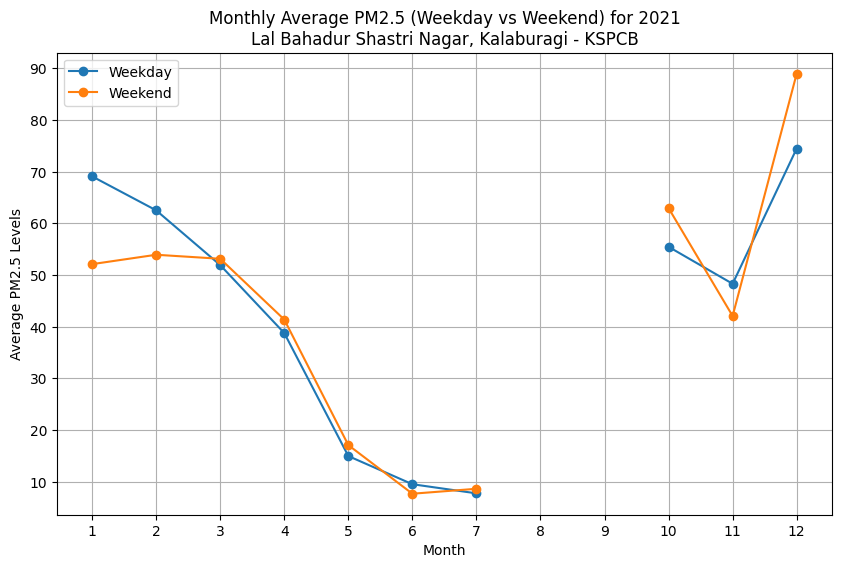

In [26]:
import matplotlib.pyplot as plt

df_2021 = df[(df['Timestamp'].dt.year == 2021) & (df['station'] == target_station)].copy()
df_2021['day_of_week'] = df_2021['Timestamp'].dt.dayofweek
df_2021['month'] = df_2021['Timestamp'].dt.month
df_2021['day_type'] = df_2021['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
monthly_avg = df_2021.groupby(['month', 'day_type'])['PM2.5'].mean().reset_index()
pivot_df = monthly_avg.pivot(index='month', columns='day_type', values='PM2.5')
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df['Weekday'], marker='o', label='Weekday')
plt.plot(pivot_df.index, pivot_df['Weekend'], marker='o', label='Weekend')
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 (Weekday vs Weekend) for 2021\nLal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022? Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = data.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2022 = df[df['Timestamp'].dt.year == 2022].copy()
df_2022['season'] = df_2022['Timestamp'].dt.month.apply(lambda m: 'Summer' if m in [3,4,5] else ('Monsoon' if m in [6,7,8,9] else None))
df_2022 = df_2022[df_2022['season'].notnull()]
avg_pm25 = df_2022.groupby(['state', 'season'])['PM2.5'].mean().reset_index()
pivot = avg_pm25.pivot(index='state', columns='season', values='PM2.5').reset_index()
pivot['pct_change'] = ((pivot['Monsoon'] - pivot['Summer']) / pivot['Summer']) * 100
pivot['abs_pct_change'] = pivot['pct_change'].abs()
max_state = pivot.loc[pivot['abs_pct_change'].idxmax(), 'state']
print(pivot)
print("State with the most difference (increase or decrease) between Monsoon and Summer in 2022:", max_state)

season              state    Monsoon     Summer  pct_change  abs_pct_change
0          Andhra Pradesh  19.355510  30.128540  -35.756894       35.756894
1       Arunachal Pradesh  15.069892  32.116292  -53.077110       53.077110
2                   Assam  21.872292  56.337647  -61.176419       61.176419
3                   Bihar  35.642356  75.834868  -53.000042       53.000042
4              Chandigarh  32.758585  59.695914  -45.124242       45.124242
5            Chhattisgarh  19.871696  22.321561  -10.975330       10.975330
6                   Delhi  42.769572  95.667628  -55.293579       55.293579
7                 Gujarat  35.852728  65.113078  -44.937747       44.937747
8                 Haryana  41.922458  81.727661  -48.704688       48.704688
9        Himachal Pradesh  38.686133  61.471943  -37.067008       37.067008
10      Jammu and Kashmir  18.049643  18.050196   -0.003063        0.003063
11              Jharkhand        NaN        NaN         NaN             NaN
12          

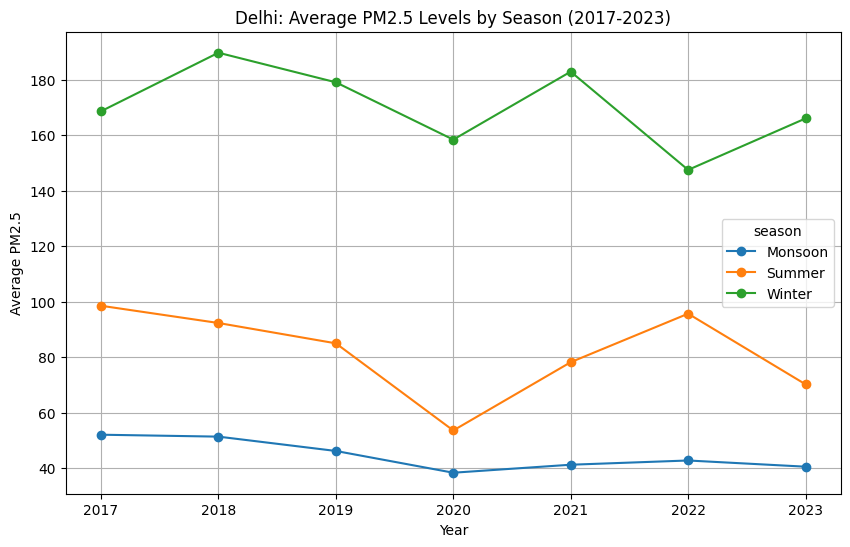

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_delhi = df[(df['state'] == 'Delhi') & (df['Timestamp'].dt.year >= 2017) & (df['Timestamp'].dt.year <= 2023)].copy()
df_delhi['season'] = df_delhi['Timestamp'].dt.month.apply(lambda m: 'Winter' if m in [12,1,2] else ('Summer' if m in [3,4,5] else ('Monsoon' if m in [6,7,8,9] else None)))
df_delhi = df_delhi[df_delhi['season'].notnull()]
df_delhi['year'] = df_delhi['Timestamp'].dt.year
seasonal_avg_delhi = df_delhi.groupby(['year', 'season'])['PM2.5'].mean().reset_index()
pivot_delhi = seasonal_avg_delhi.pivot(index='year', columns='season', values='PM2.5').sort_index()
pivot_delhi.plot(marker='o', figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Delhi: Average PM2.5 Levels by Season (2017-2023)")
plt.grid(True)
plt.show()

Funding Based

In [30]:
state_data=pd.read_csv("State_data.csv")
ncap_funding=pd.read_csv("NCAP_Funding.csv")
data=pd.read_csv("Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'State_data.csv'

Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

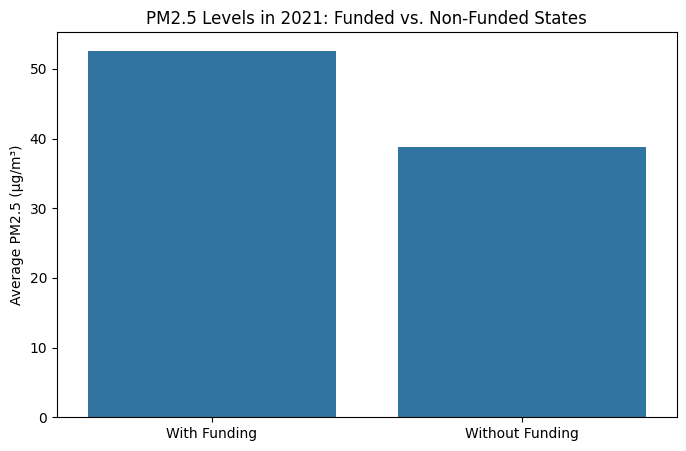

In [29]:
ncap_funding["Amount released during FY 2021-22"] = pd.to_numeric(ncap_funding["Amount released during FY 2021-22"], errors="coerce")
funded_states = ncap_funding[ncap_funding["Amount released during FY 2021-22"] > 0]["State"].unique()
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data_2021 = data[data["Timestamp"].dt.year == 2021]
state_pm25_2021 = data_2021.groupby("state")["PM2.5"].mean()
pm25_with_funding = state_pm25_2021[state_pm25_2021.index.isin(funded_states)]
pm25_without_funding = state_pm25_2021[~state_pm25_2021.index.isin(funded_states)]

plt.figure(figsize=(8, 5))
sns.barplot(x=["With Funding", "Without Funding"], y=[pm25_with_funding.mean(), pm25_without_funding.mean()])
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in 2021: Funded vs. Non-Funded States")
plt.show()

Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


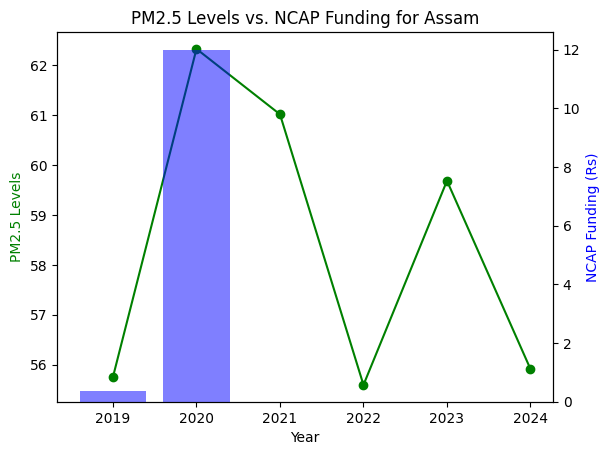

In [53]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

data_assam = data[data["state"] == "Assam"]

data_assam = data_assam.groupby(data_assam["Timestamp"].dt.year)["PM2.5"].mean().reset_index()
data_assam.columns = ["Year", "PM2.5"]

funding_assam = ncap_funding[ncap_funding["State"] == "Assam"]
funding_years = ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
funding_assam = funding_assam[funding_years].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
funding_trend = pd.DataFrame({"Year": [2019, 2020, 2021], "Funding": funding_assam.sum().values.astype(float)})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_assam["Year"], data_assam["PM2.5"], 'g-o', label="PM2.5 Levels")
ax2.bar(funding_trend["Year"], funding_trend["Funding"].astype(float), color='b', alpha=0.5, label="NCAP Funding")

ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Levels", color='g')
ax2.set_ylabel("NCAP Funding (Rs)", color='b')
ax1.set_title("PM2.5 Levels vs. NCAP Funding for Assam")
plt.show()

#From the data trends, we observe that PM2.5 levels have decreased after NCAP funding increased, it suggests that the funding may have contributed to improving air quality.

Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


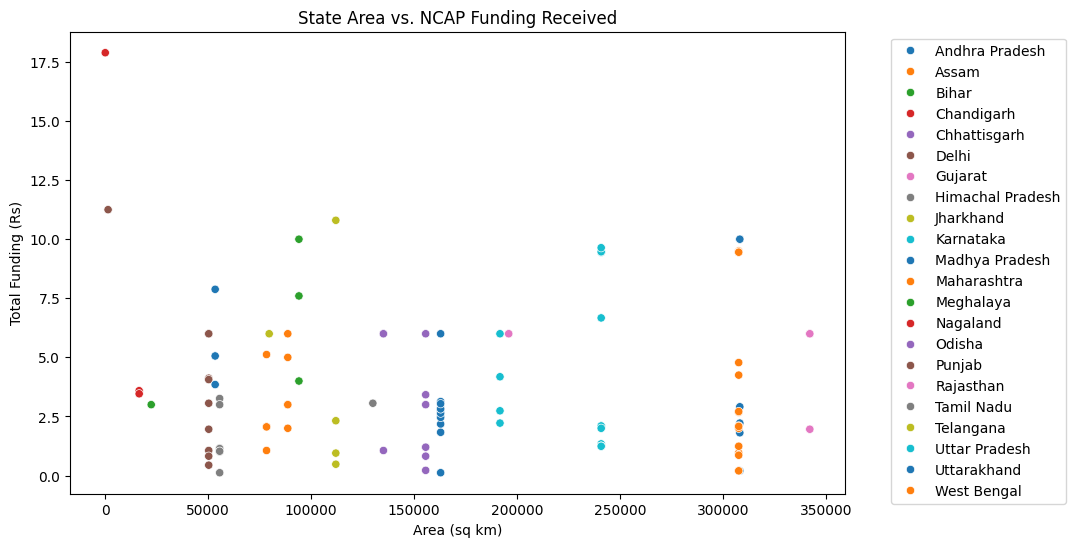

In [59]:
funding_years = ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
ncap_funding["Total Funding"] = ncap_funding[funding_years].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce').sum(axis=1)
merged_df = pd.merge(ncap_funding[["State", "Total Funding"]], state_data[["State", "Area_km2"]], on="State", how="inner")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="Area_km2", y="Total Funding", hue="State", palette="tab10")
plt.xlabel("Area (sq km)")
plt.ylabel("Total Funding (Rs)")
plt.title("State Area vs. NCAP Funding Received")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Miscellaneous Questions

For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [32]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data_2023 = data[data["Timestamp"].dt.year == 2023]

city_pm25_2023 = data_2023.groupby("city")["PM2.5"].mean()
most_polluted_city = city_pm25_2023.idxmax()

hazardous_days = data_2023[(data_2023["city"] == most_polluted_city) & (data_2023["PM2.5"] > 300)]
total_days = data_2023[data_2023["city"] == most_polluted_city]["Timestamp"].nunique()
hazardous_percentage = (len(hazardous_days) / total_days) * 100

print(f"{most_polluted_city} had {hazardous_percentage:.2f}% of days with PM2.5 above 300 µg/m³ in 2023.")

Darbhanga had 0.82% of days with PM2.5 above 300 µg/m³ in 2023.


Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

<ipython-input-33-7f5acf38af00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Month"] = delhi_data["Timestamp"].dt.month
<ipython-input-33-7f5acf38af00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Year"] = delhi_data["Timestamp"].dt.year


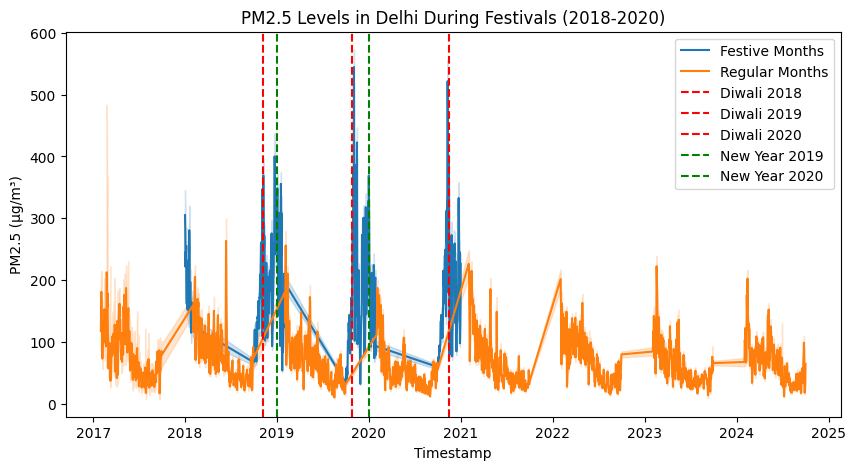

In [33]:
delhi_data = data[data["city"] == "Delhi"]
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
delhi_data["Year"] = delhi_data["Timestamp"].dt.year

festive_months = delhi_data[(delhi_data["Month"].isin([10, 11, 12, 1])) & (delhi_data["Year"].isin([2018, 2019, 2020]))]
regular_months = delhi_data[~delhi_data["Month"].isin([10, 11, 12, 1])]

plt.figure(figsize=(10, 5))
sns.lineplot(x=festive_months["Timestamp"], y=festive_months["PM2.5"], label="Festive Months")
sns.lineplot(x=regular_months["Timestamp"], y=regular_months["PM2.5"], label="Regular Months")

plt.axvline(pd.Timestamp("2018-11-07"), color="r", linestyle="--", label="Diwali 2018")
plt.axvline(pd.Timestamp("2019-10-27"), color="r", linestyle="--", label="Diwali 2019")
plt.axvline(pd.Timestamp("2020-11-14"), color="r", linestyle="--", label="Diwali 2020")
plt.axvline(pd.Timestamp("2019-01-01"), color="g", linestyle="--", label="New Year 2019")
plt.axvline(pd.Timestamp("2020-01-01"), color="g", linestyle="--", label="New Year 2020")

plt.legend()
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in Delhi During Festivals (2018-2020)")
plt.show()

Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

The state that received the highest NCAP funding in 2020 is: Assam


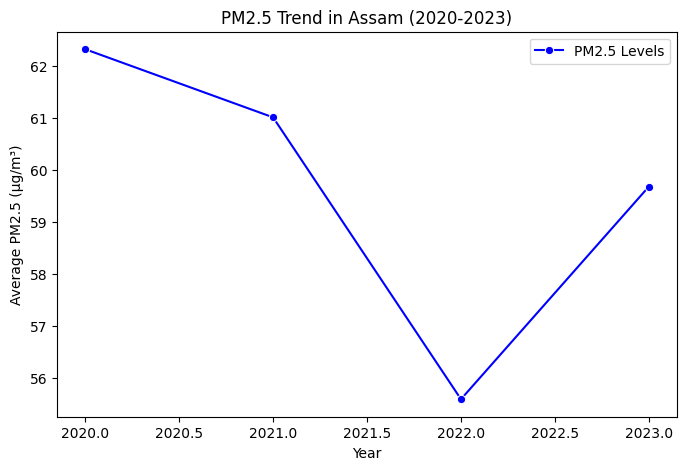

In [34]:
ncap_funding.columns = ncap_funding.columns.str.strip()

highest_funded_state_2020 = ncap_funding.loc[ncap_funding["Amount released during FY 2020-21"].idxmax(), "State"]
print(f"The state that received the highest NCAP funding in 2020 is: {highest_funded_state_2020}")

data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

data["Year"] = data["Timestamp"].dt.year
state_pm25 = data[data["state"] == highest_funded_state_2020].groupby("Year")["PM2.5"].mean().reset_index()

state_pm25 = state_pm25[state_pm25["Year"].between(2020, 2023)]

plt.figure(figsize=(8, 5))
sns.lineplot(x=state_pm25["Year"], y=state_pm25["PM2.5"], marker="o", color="b", label="PM2.5 Levels")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend in {highest_funded_state_2020} (2020-2023)")
plt.legend()
plt.show()

Draw the map of India and plot the sensor locations on the map.



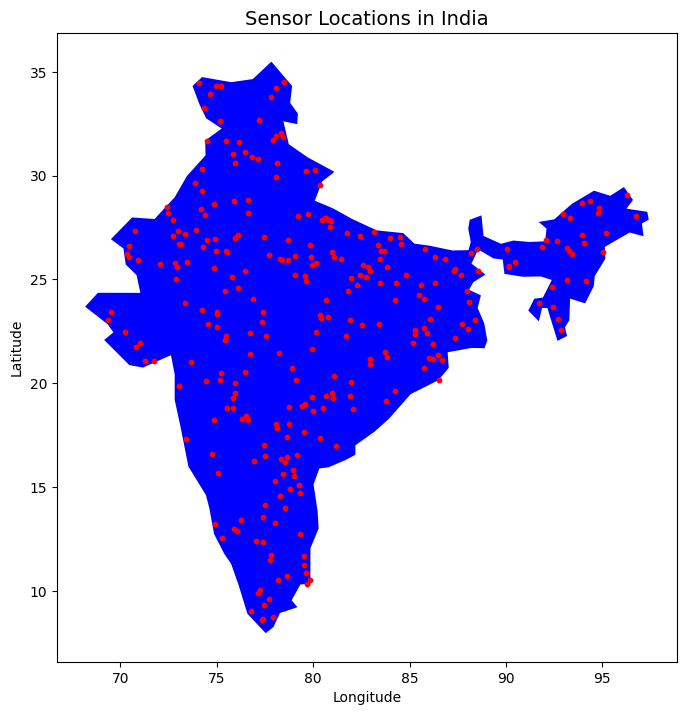

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
india = world[world.ADMIN == "India"]

india_shape = india.geometry.iloc[0]

num_sensors = 300
np.random.seed(42)

sensor_locations = []
while len(sensor_locations) < num_sensors:
    lat = np.random.uniform(8, 37)
    lon = np.random.uniform(68, 97)
    point = Point(lon, lat)

    if india_shape.contains(point):
        sensor_locations.append((lat, lon))


fig, ax = plt.subplots(figsize=(8, 10))
india.plot(ax=ax, color='blue')

ax.scatter([lon for lat, lon in sensor_locations],
           [lat for lat, lon in sensor_locations],
           color='red', marker='o', s=10)

ax.set_title("Sensor Locations in India", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

In [43]:
display(data)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [44]:
missing_pm25 = data["PM2.5"].isnull().sum()
missing_pm10 = data["PM10"].isnull().sum()

print(f"Missing PM2.5 values: {missing_pm25}")
print(f"Missing PM10 values: {missing_pm10}")
#The huge number of missing PM2.5 and PM10 values shows poor air quality monitoring infrastructure in many locations, making it difficult to assess pollution trends accurately.Therefore the government has to spend more to increase monitoring.


Missing PM2.5 values: 899113
Missing PM10 values: 928447


In [48]:

ncap_funding["Total fund released"] = pd.to_numeric(ncap_funding["Total fund released"], errors='coerce')
highest_funded_state = ncap_funding.groupby("State")["Total fund released"].sum().idxmax()
highest_funding_amount = ncap_funding.groupby("State")["Total fund released"].sum().max()
print(f"State with highest NCAP funding: {highest_funded_state} (₹{highest_funding_amount} crore)")
up_pm25_data = data[data["state"] == highest_funded_state]["PM2.5"]
average_pm25_up = up_pm25_data.mean()
print(f"Average PM2.5 levels in {highest_funded_state}: {average_pm25_up:.2f} µg/m³")
up_pm10_data = data[data["state"] == highest_funded_state]["PM10"]
average_pm25_up = up_pm10_data.mean()
print(f"Average PM2.5 levels in {highest_funded_state}: {average_pm25_up:.2f} µg/m³")

#This also shows that despite UP having such a high funding still has high levels of PM2.5. The state should thus monitor if the funding is being utilized appropriately.

State with highest NCAP funding: Uttar Pradesh (₹76.94 crore)
Average PM2.5 levels in Uttar Pradesh: 70.89 µg/m³
Average PM2.5 levels in Uttar Pradesh: 146.58 µg/m³
